Gradient descent can be compared to descending a mountain or valley. We will learn gradient descent by creating a program to descend from Mt. Fuji, with the elevation data of Mt. Fuji as the objective function we want to minimize .

In [1]:
import numpy as np
csv_path = "mtfuji_data.csv" # Specify the file name (path)
np.set_printoptions(suppress=True) # Set prohibition of scientific notation
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)
fuji[130:140]

array([[  130.      ,    35.352505,   138.756638,  2563.4     ,
        41888.      ],
       [  131.      ,    35.35418 ,   138.753742,  2703.1     ,
        42210.      ],
       [  132.      ,    35.355855,   138.750846,  2825.55    ,
        42532.      ],
       [  133.      ,    35.35753 ,   138.74795 ,  2967.9     ,
        42854.      ],
       [  134.      ,    35.359205,   138.745054,  3087.81    ,
        43177.      ],
       [  135.      ,    35.36088 ,   138.742157,  3266.24    ,
        43499.      ],
       [  136.      ,    35.362555,   138.739261,  3434.59    ,
        43821.      ],
       [  137.      ,    35.36423 ,   138.736364,  3600.08    ,
        44143.      ],
       [  138.      ,    35.365904,   138.733468,  3679.96    ,
        44466.      ],
       [  139.      ,    35.367579,   138.730571,  3664.9     ,
        44788.      ]])

From the left, they are the "point number," "latitude," "longitude," "altitude," and "distance from point 0." The units of altitude and distance are meters.

In [2]:
print(fuji[:,0])

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 

# [Problem 1] Data visualization
Visualize elevation data using Matplotlib. If you set "the number of the point" on the horizontal axis and "elevation" on the vertical axis, you can draw a cross-sectional view of Mt. Fuji.

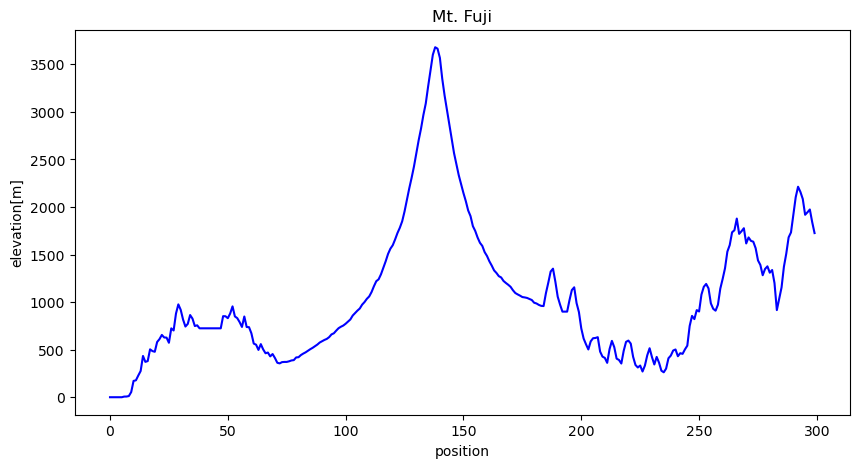

In [5]:
import math
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(fuji[:,0],fuji[:,3], color="blue")
plt.title("Mt. Fuji")
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.show()

# [Problem 2] Create a function to calculate the gradient at a certain point
In "Two-dimensional array and gradient problem", the gradient at each point was calculated first. However, if you imagine Mt. Fuji in the dark, you can only know the slope of your current location.

Create a function to find the gradient by the relationship between "the number of the current point" and "the number of the next point you are now (number of the current point-1)".

The gradient was calculated by the following formula, but in this data, "elevation" corresponds to y and "the number of that point" corresponds to x.

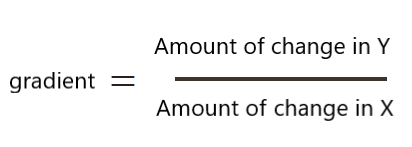

In [7]:
def gradient_slope_specific(fuji, specific_point):
    specific_point_position=fuji[specific_point,:]
    next_point_position=fuji[specific_point+1,:]
    d_x=next_point_position[0]-specific_point_position[0]
    d_y=next_point_position[3]-specific_point_position[3]
    gradient=d_y/d_x
    return gradient
print(gradient_slope_specific(fuji,120)) #Point 120

61.070000000000164


In [8]:
def gradient_slope_all(fuji):
    d_x=np.gradient(fuji[:,0])
    d_y=np.gradient(fuji[:,3])
    gradient=d_y/d_x
    return gradient

# [Problem 3] Create a function to calculate the destination point
Create a function that calculates the next destination point based on the gradient information of the current point.

Expressed mathematically, this can be expressed as "destination point = current point - $\alpha$ × gradient of current point."

For the "gradient at the current point", use the return value of the function created in Problem 2. $\alpha$ is a hyperparameter that can take any value greater than 0. In the field of machine learning, this is called the learning rate. The way the gradient descends changes depending on this value. Set it to 0.2 here, for example.


When calculating the above formula, the destination point will have a floating point number, but in order to obtain the gradient information, the point must be expressed as an integer. Therefore, convert by rounding. Also, it is necessary to handle the case where the value is not possible. For example, if the destination point is negative, the gradient cannot be obtained next time because there is no such data.

In [9]:
def destination_point(fuji,current_position,alpha=0.2):
    #destination point = current point - a*gradient of current point.
    destination_point=fuji    
    if alpha>0:
        destination_point=current_position-alpha*gradient_slope_specific(fuji,current_position)
    else:
        return "Error, alpha not greater than 0"
    return np.round(destination_point).astype(int)
print("The next point to move to based on the information on the slope of the current point is: ",destination_point(fuji,130))

The next point to move to based on the information on the slope of the current point is:  102


# [Problem 4] Create a function to go down the mountain
Create a function that goes down the mountain. Receive the first point and update the point with the function in Problem 3. Record the points for each move in a list, etc., and use this as the return value of the function.

The first "current location" is the 136th location (elevation 3434.59 [m]) near the summit of Mt. Fuji. Let's go down the mountain from here.

<< Implementation Precautions >>

Since we are rounding in question 3, the destination point may be the same as the current point. Since the amount of movement has decreased, please judge that you have gone down the mountain at that point. This does not happen with the actual gradient descent method.

In [12]:
def descend_mountain(start_point, elevation_data, alpha=0.2):
    """
    Simulates the descent of the mountain using gradient descent.
    """
    points_visited = [start_point]
    current_point = start_point

    while True:
        next_point = destination_point(elevation_data,current_point , alpha)

        if next_point is None or next_point == current_point:
            break  # Stop if we can't move further

        points_visited.append(next_point)
        current_point = next_point

    return points_visited

# Example usage
path = descend_mountain(136, fuji)
print("Path during descent:", path)


Path during descent: [136, 103, 98, 95, 89, 86, 83, 80, 76, 74]


# [Problem 5] Visualization of the descent process
Visualize the descending process in Problem 4 with a graph using Matplotlib.

<< Visualization example >>

Display points moved in the cross section as dots
Make a line graph of altitude and slope for each repetition

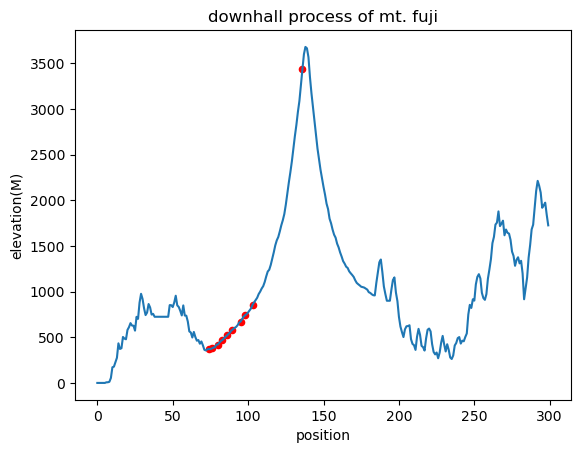

In [14]:
fuji_elevations = fuji[:, 3]
descended_elevations = fuji_elevations[path]

plt.title("downhall process of mt. fuji")
plt.xlabel("position")
plt.ylabel("elevation(M)")
plt.plot(fuji_elevations)
plt.scatter(path, descended_elevations, 20, color = "red")
plt.show()

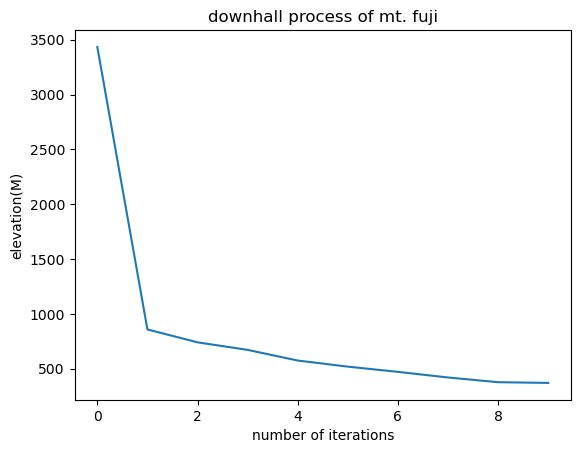

In [15]:
fuji_elevations = fuji[:, 3]
descended_elevations = fuji_elevations[path]

plt.title("downhall process of mt. fuji")
plt.xlabel("number of iterations")
plt.ylabel("elevation(M)")
plt.plot(descended_elevations)
plt.show()     

# [Problem 6] Change of initial value

In [39]:
all_paths = []
for i, start_position in enumerate(range(1, 299)):
    all_paths.append(descend_mountain(start_position, fuji, alpha = 0.2))
    print(len(all_paths))

1
2
3
4
5
6
7
8


KeyboardInterrupt: 

# [Problem 7] Visualization of the descent process for each initial value

AttributeError: 'list' object has no attribute 'items'

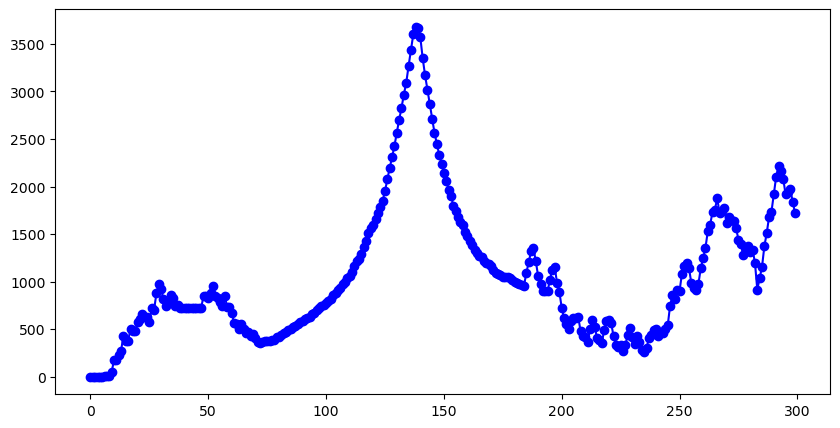

In [40]:
def visualize_multiple_descents(x, y, all_paths):
    plt.figure(figsize=(10, 5))
    plt.plot(x, y, marker='o', linestyle='-', color='b', label="Elevation")
    
    for start, path in all_paths.items():
        plt.scatter(path, [y[np.where(x == p)][0] for p in path], label=f"Start {start}")

    plt.xlabel("Point Number")
    plt.ylabel("Elevation (m)")
    plt.title("Multiple Descent Paths")
    plt.legend()
    plt.grid()
    plt.show()

visualize_multiple_descents(fuji[:,0], fuji[:,3], all_paths)